In [1]:
import numpy as np
import pandas as pd
import shap
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, plot_confusion_matrix, classification_report

import lightgbm as lgb

from utils import *

/trinity/shared/opt/python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/trinity/shared/opt/python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/trinity/shared/opt/python-3.6.8/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/trinity/shared/opt/python-3.6.8/lib/python3.6/site-

In [2]:
data_folder =  'csv_data/'
suffix = ''

df_public = pd.read_csv(data_folder + 'df_public_test' + suffix +'.csv', index_col='Unnamed: 0')
df_private = pd.read_csv(data_folder + 'df_private_test' + suffix +'.csv', index_col='Unnamed: 0')
df_ER = pd.read_csv(data_folder + 'df_ER' + suffix +'.csv', index_col='Unnamed: 0')
df_NR = pd.read_csv(data_folder + 'df_NR' + suffix +'.csv', index_col='Unnamed: 0')

df_NR['abs_dmu_x'] = np.abs(df_NR['mu_x'] - 288)
df_NR['abs_dmu_y'] = np.abs(df_NR['mu_y'] - 288)

df_ER['abs_dmu_x'] = np.abs(df_ER['mu_x'] - 288)
df_ER['abs_dmu_y'] = np.abs(df_ER['mu_y'] - 288)

df_public['abs_dmu_x'] = np.abs(df_public['mu_x'] - 288)
df_public['abs_dmu_y'] = np.abs(df_public['mu_y'] - 288)

df_private['abs_dmu_x'] = np.abs(df_private['mu_x'] - 288)
df_private['abs_dmu_y'] = np.abs(df_private['mu_y'] - 288)

df = pd.concat([df_NR, df_ER])

feat_list = [df_ER.columns[i] for i in range(len(df_ER.columns)) if df_ER.columns[i][-11:-1] != 'bkgr_only_']
feat_list_bkgr = [df_ER.columns[i] for i in range(len(df_ER.columns)) if df_ER.columns[i][-11:-1] == 'bkgr_only_']

In [3]:
X_ER = df.query('sig_count_y > 100 and event_energy>1 and event_energy<20 and event_class == "ER"').sig_count_y.values.reshape(-1, 1)
y_ER = df.query('sig_count_y > 100 and event_energy>1 and event_energy<20 and event_class == "ER"').event_energy.values.reshape(-1, 1)
idx = [i for i in range(len(X_ER)) if (X_ER[i]< 2000 or y_ER[i] != 1)]
X_ER = [X_ER[i][0] for i in idx]
y_ER = [y_ER[i][0] for i in idx]
a_ER, b_ER = np.polyfit(y_ER, X_ER, deg=1)

X_NR = df.query('event_energy>3 and event_energy<30 and event_class == "NR"').sig_count_y.values.reshape(-1, 1)
y_NR = df.query('event_energy>3 and event_energy<30 and event_class == "NR"').event_energy.values.reshape(-1, 1)
idx = [i for i in range(len(X_NR))]
X_NR = [X_NR[i][0] for i in idx]
y_NR = [y_NR[i][0] for i in idx]
a_NR, b_NR = np.polyfit(y_NR, X_NR, deg=1)

In [4]:
E_pred = (df_private['sig_count_y'].values - b_NR)/a_NR

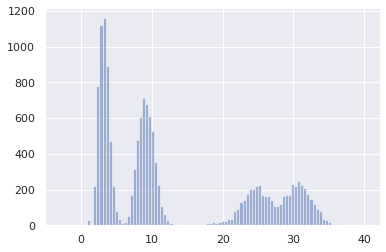

In [5]:
hist = plt.hist(E_pred, bins=100, range=(-3, 40), alpha=0.5, label='private')
plt.show()

In [6]:
# [-inf, 6] [6, 14] [14, +inf]

In [7]:
# Labels: ER->1 NR->0

## High energies

In [8]:
df_NR[feat_list].columns

Index(['N_error_x', 'N_error_y', 'N_x', 'N_y', 'bkgr_count_x', 'bkgr_count_y',
       'chi2_pvalue_x', 'chi2_pvalue_y', 'chi2_x', 'chi2_y', 'dfr', 'dmu',
       'dsigma', 'edm_x', 'edm_y', 'event_ID', 'event_angle', 'event_class',
       'event_energy', 'fr_error_x', 'fr_error_y', 'fr_x', 'fr_y', 'fval_x',
       'fval_y', 'has_accurate_covar_x', 'has_accurate_covar_y',
       'has_covariance_x', 'has_covariance_y', 'has_made_posdef_covar_x',
       'has_made_posdef_covar_y', 'has_parameters_at_limit_x',
       'has_parameters_at_limit_y', 'has_posdef_covar_x', 'has_posdef_covar_y',
       'has_reached_call_limit_x', 'has_reached_call_limit_y',
       'has_valid_parameters_x', 'has_valid_parameters_y', 'hesse_failed_x',
       'hesse_failed_y', 'image_name', 'is_above_max_edm_x',
       'is_above_max_edm_y', 'is_valid_x', 'is_valid_y', 'mu_error_x',
       'mu_error_y', 'mu_x', 'mu_y', 'n_excess_bins_x', 'n_excess_bins_y',
       'nfcn_total_x', 'nfcn_total_y', 'nfcn_x', 'nfcn_y', 'ngr

In [9]:
wiggly_vars = [
              'chi2_pvalue_x', 'chi2_pvalue_y', 
              'dfr', 
              'dmu', 'dsigma', 
              'sigma_x', 'sigma_y', 
              'mu_x', 'mu_y',
              'abs_dmu_x', 'abs_dmu_y',
              'n_excess_bins_x', 'n_excess_bins_y', 
              ]

In [10]:
df_1 = df[df['event_energy'] == 1][:500]
df_3 = df[df['event_energy'] == 3][:500]
df_6 = df[df['event_energy'] == 6][:500]
df_10 = df[df['event_energy'] == 10][:500]
df_20 = df[df['event_energy'] == 20][:500]
df_20 = df_20.query('event_class != "ER"')
df_30 = df[df['event_energy'] == 30]
df_30 = df_30.query('event_class != "NR"')
df_w_vs_all = pd.concat([df_1,df_3,df_6,df_10,df_20,df_30])

X = df_w_vs_all[wiggly_vars]
y = df_w_vs_all['event_energy'] == 30

In [11]:
lgb_train = lgb.Dataset(X, y, free_raw_data=False)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'early_stopping_rounds': 10
}

gbm = lgb.train(
                params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,  # eval training data
                verbose_eval=True,
#                 feature_name=X_train.columns,
#                 categorical_feature=[21]
               )

Found `early_stopping_rounds` in params. Will use it instead of argument


[1]	valid_0's binary_logloss: 0.610097
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.542834
[3]	valid_0's binary_logloss: 0.486233
[4]	valid_0's binary_logloss: 0.439129
[5]	valid_0's binary_logloss: 0.396082
[6]	valid_0's binary_logloss: 0.358722
[7]	valid_0's binary_logloss: 0.325213
[8]	valid_0's binary_logloss: 0.296616
[9]	valid_0's binary_logloss: 0.271759
[10]	valid_0's binary_logloss: 0.248782
[11]	valid_0's binary_logloss: 0.228347
[12]	valid_0's binary_logloss: 0.210347
[13]	valid_0's binary_logloss: 0.19461
[14]	valid_0's binary_logloss: 0.180707
[15]	valid_0's binary_logloss: 0.167538
[16]	valid_0's binary_logloss: 0.155735
[17]	valid_0's binary_logloss: 0.14501
[18]	valid_0's binary_logloss: 0.134819
[19]	valid_0's binary_logloss: 0.125527
[20]	valid_0's binary_logloss: 0.117657
[21]	valid_0's binary_logloss: 0.109802
[22]	valid_0's binary_logloss: 0.10277
[23]	valid_0's binary_logloss: 0.0968012
[24]	valid_0's binary_logloss:

In [13]:
gbm.predict(df.query('event_energy == 20 and event_class == "ER"')[wiggly_vars])

array([1.       , 0.9999987])

In [14]:
gbm.predict(df.query('event_energy == 30 and event_class == "NR"')[wiggly_vars])

array([1.03413519e-03, 4.06148485e-10])

#### public

In [15]:
E_pred_public = (df_public['sig_count_y'].values - b_NR)/a_NR 
idx_HE_public = [i for i in range(len(E_pred_public)) if E_pred_public[i] >= 14]

In [16]:
HE_cl_pred_public = np.array(list(gbm.predict(df_public.iloc[idx_HE_public][wiggly_vars])))
HE_reg_pred_public = np.array([30 if HE_cl_pred_public[i]>0.5 else 20 for i in range(len(idx_HE_public))])
HE_im_names_public = np.array(list(df_public.iloc[idx_HE_public]['image_name'].values))

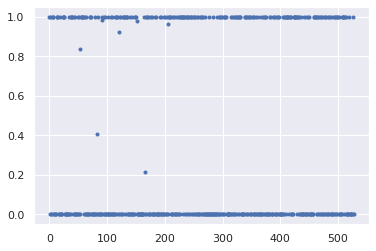

In [20]:
plt.plot(HE_cl_pred_public, '.')

(array([315.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 213.]),
 array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.]),
 <BarContainer object of 10 artists>)

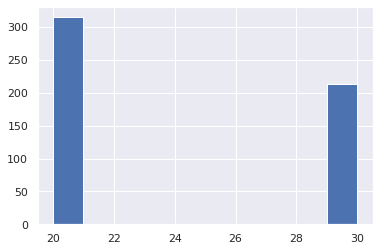

In [21]:
plt.hist(HE_reg_pred_public)

#### private

In [22]:
E_pred_private = (df_private['sig_count_y'].values - b_NR)/a_NR 
idx_HE_private = [i for i in range(len(E_pred_private)) if E_pred_private[i] >= 14]

In [23]:
HE_cl_pred = np.array(list(gbm.predict(df_private.iloc[idx_HE_private][wiggly_vars])))
HE_reg_pred = np.array([20 if HE_cl_pred[i]>0.5 else 30 for i in range(len(idx_HE_private))])
HE_im_names = np.array(list(df_private.iloc[idx_HE_private]['image_name'].values))

In [24]:
# plt.plot(HE_cl_pred, '.')

In [25]:
# plt.hist(HE_reg_pred)

#### submission

In [174]:
cl_pred = np.append(np.round(HE_cl_pred_public), np.round(HE_cl_pred))
reg_pred = np.append(HE_reg_pred_public, HE_reg_pred)
im_names = np.append(HE_im_names_public, HE_im_names)
generate_submission(cl_pred, reg_pred, im_names, 'HE_predictions')

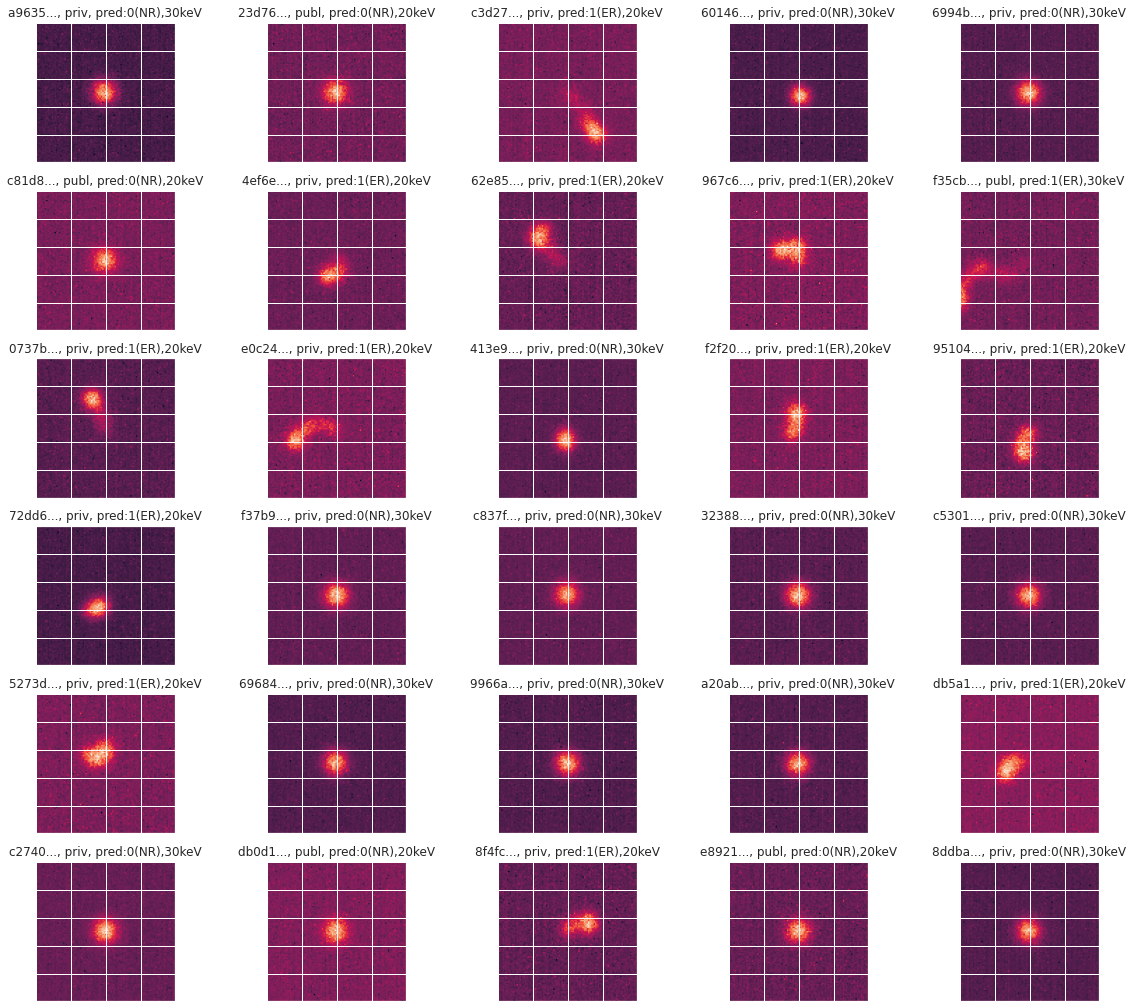

In [175]:
tmp = plot_images('../../idao_dataset/', im_filename='HE_predictions.csv', max_num_images=30)

## Mid energies

In [27]:
clf_vars = [
#               'chi2_pvalue_x', 'chi2_pvalue_y', 
#                'chi2_x', 'chi2_y',
#               'dfr', 
#               'dmu', 'dsigma', 
#               'fr_error_x', 'fr_error_y', 'fr_x', 'fr_y',
              'sigma_x', 'sigma_y', 
#               'sigma_error_x', 'sigma_error_y', 
#               'mu_x', 'mu_y', 
#               'mu_error_x', 'mu_error_y', 
#               'n_excess_bins_x', 'n_excess_bins_y', 
#                'nfcn_total_x', 'nfcn_total_y',
#        'nfcn_x', 'nfcn_y', 'ngrad_total_x', 'ngrad_total_y', 'ngrad_x', 'ngrad_y', 
#               'sig_count_x', 'sig_count_y', 
#               'sig_density_x', 'sig_density_y', 
#                'dsig_count'
              ]

In [28]:
df_6 = df[df['event_energy'] == 6]
df_6 = df_6.query('event_class != "ER"')
df_10 = df[df['event_energy'] == 10]
df_10 = df_10.query('event_class != "NR"')
df_6_vs_10 = pd.concat([df_6, df_10])

In [29]:
X = df_6_vs_10[clf_vars]
y = df_6_vs_10['event_energy'] == 10

In [30]:
lgb_train = lgb.Dataset(X, y, free_raw_data=False)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

In [31]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'early_stopping_rounds': 10
}

In [32]:
clf = lgb.train(
                params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,  # eval training data
                verbose_eval=True,
#                 feature_name=X_train.columns,
#                 categorical_feature=[21]
               )

Found `early_stopping_rounds` in params. Will use it instead of argument


[1]	valid_0's binary_logloss: 0.625542
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.569853
[3]	valid_0's binary_logloss: 0.523721
[4]	valid_0's binary_logloss: 0.484851
[5]	valid_0's binary_logloss: 0.451949
[6]	valid_0's binary_logloss: 0.423355
[7]	valid_0's binary_logloss: 0.398946
[8]	valid_0's binary_logloss: 0.377948
[9]	valid_0's binary_logloss: 0.359578
[10]	valid_0's binary_logloss: 0.344089
[11]	valid_0's binary_logloss: 0.329942
[12]	valid_0's binary_logloss: 0.317578
[13]	valid_0's binary_logloss: 0.306861
[14]	valid_0's binary_logloss: 0.297368
[15]	valid_0's binary_logloss: 0.28882
[16]	valid_0's binary_logloss: 0.281222
[17]	valid_0's binary_logloss: 0.274541
[18]	valid_0's binary_logloss: 0.268832
[19]	valid_0's binary_logloss: 0.263659
[20]	valid_0's binary_logloss: 0.258967
[21]	valid_0's binary_logloss: 0.254453
[22]	valid_0's binary_logloss: 0.250663
[23]	valid_0's binary_logloss: 0.247418
[24]	valid_0's binary_logloss

In [33]:
clf.predict(df.query('event_energy == 6 and event_class == "ER"')[clf_vars])

array([0.99955104])

In [34]:
clf.predict(df.query('event_energy == 10 and event_class == "NR"')[clf_vars])

array([0.00838927, 0.01052336])

#### public

In [35]:
E_pred_public = (df_public['sig_count_y'].values - b_NR)/a_NR 
idx_MID_public = [i for i in range(len(E_pred_public)) if E_pred_public[i] > 5.3 and E_pred_public[i] < 14]

In [36]:
MID_cl_pred_public = np.array(list(clf.predict(df_public.iloc[idx_MID_public][clf_vars])))
MID_reg_pred_public = np.array([10 if MID_cl_pred_public[i]>0.5 else 6 for i in range(len(idx_MID_public))])
MID_im_names_public = np.array(list(df_public.iloc[idx_MID_public]['image_name'].values))

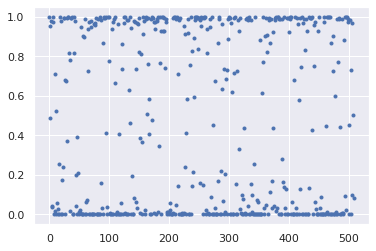

In [37]:
plt.plot(MID_cl_pred_public, '.')

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 243.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <BarContainer object of 10 artists>)

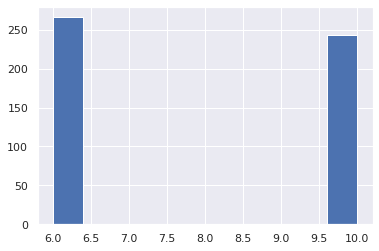

In [38]:
plt.hist(MID_reg_pred_public)

#### private

In [39]:
E_pred_private = (df_private['sig_count_y'].values - b_NR)/a_NR 
idx_MID_private = [i for i in range(len(E_pred_private)) if E_pred_private[i] > 6 and E_pred_private[i] < 14]

In [40]:
MID_cl_pred = np.array(list(clf.predict(df_private.iloc[idx_MID_private][clf_vars])))
MID_reg_pred = np.array([6 if MID_cl_pred[i]>0.5 else 10 for i in range(len(idx_MID_private))])
MID_im_names = np.array(list(df_private.iloc[idx_MID_private]['image_name'].values))

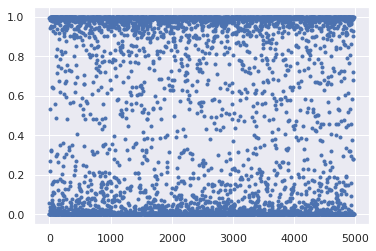

In [41]:
plt.plot(MID_cl_pred, '.')

(array([2377.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2595.]),
 array([ 6. ,  6.4,  6.8,  7.2,  7.6,  8. ,  8.4,  8.8,  9.2,  9.6, 10. ]),
 <BarContainer object of 10 artists>)

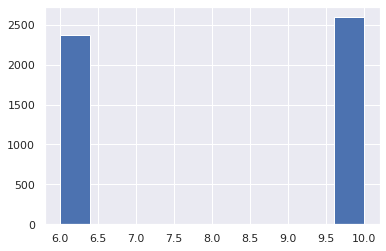

In [42]:
plt.hist(MID_reg_pred)

In [239]:
cl_pred = np.append(np.round(MID_cl_pred_public), np.round(MID_cl_pred))
reg_pred = np.append(MID_reg_pred_public, MID_reg_pred)
im_names = np.append(MID_im_names_public, MID_im_names)
generate_submission(cl_pred, reg_pred, im_names, 'MID_predictions')

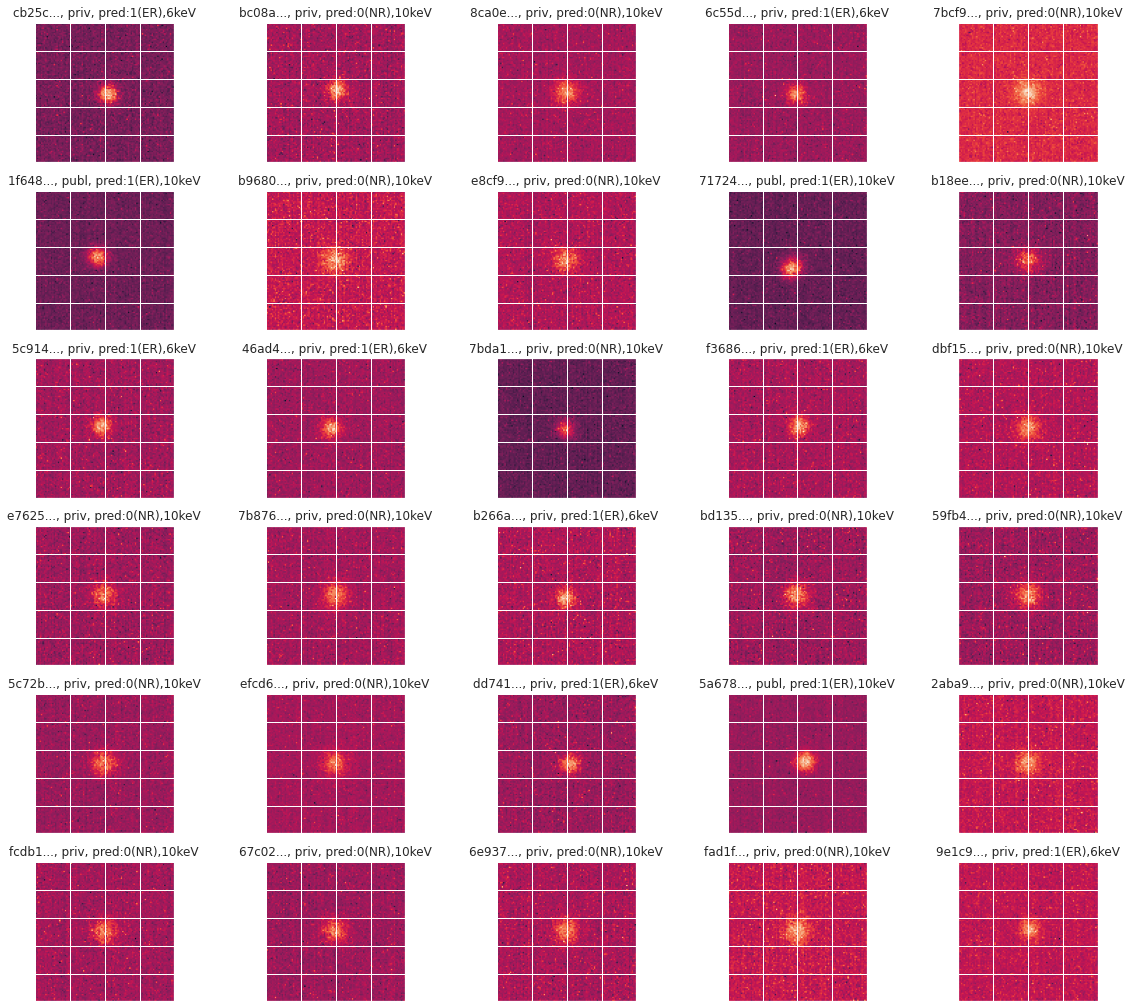

In [240]:
tmp = plot_images('../../idao_dataset/', im_filename='MID_predictions.csv', max_num_images=30)

## Low energies

In [45]:
E_pred_1ER = a_ER*1 + b_ER
E_pred_1NR = a_NR*1 + b_NR
print(E_pred_1ER)
print(E_pred_1NR)
# E_th = 935 # (E_pred_1ER + E_pred_1NR) / 2
# print(E_th)

731.2651522098898
-287.3643063492434


In [46]:
df_1 = df[df['event_energy'] == 1]
df_1 = df_1.query('event_class != "ER"')
df_3 = df[df['event_energy'] == 3]
df_3 = df_3.query('event_class != "NR"')
df_1_vs_3 = pd.concat([df_1, df_3])

In [47]:
clf_vars = [ 
            'sig_count_y'
              ]

In [48]:
X = df_1_vs_3[clf_vars]
y = df_1_vs_3['event_energy'] == 3

#### public

In [49]:
clf_vars_publ = [
#             'chi2_pvalue_bkgr_only_x',
#              'chi2_pvalue_bkgr_only_y',
#             'sigma_x', 'sigma_y'
    'sig_count_x', 'sig_count_y'
              ]



In [50]:
df_1 = df[df['event_energy'] == 1]
df_1 = df_1.query('event_class != "ER"')
df_3 = df[df['event_energy'] == 3]
df_3 = df_3.query('event_class != "NR"')
df_1_vs_3 = pd.concat([df_1, df_3])

In [51]:
X = df_1_vs_3[clf_vars_publ]
y = df_1_vs_3['event_energy'] == 3

In [52]:
lgb_train = lgb.Dataset(X, y, free_raw_data=False)
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

In [53]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'max_depth': 4,
    'learning_rate': 0.1,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'early_stopping_rounds': 10
}

In [54]:
clf = lgb.train(
                params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,  # eval training data
                verbose_eval=True,
#                 feature_name=X_train.columns,
#                 categorical_feature=[21]
               )

Found `early_stopping_rounds` in params. Will use it instead of argument


[1]	valid_0's binary_logloss: 0.603275
Training until validation scores don't improve for 10 rounds
[2]	valid_0's binary_logloss: 0.52987
[3]	valid_0's binary_logloss: 0.468694
[4]	valid_0's binary_logloss: 0.417037
[5]	valid_0's binary_logloss: 0.372778
[6]	valid_0's binary_logloss: 0.334189
[7]	valid_0's binary_logloss: 0.300568
[8]	valid_0's binary_logloss: 0.271324
[9]	valid_0's binary_logloss: 0.245606
[10]	valid_0's binary_logloss: 0.223048
[11]	valid_0's binary_logloss: 0.203216
[12]	valid_0's binary_logloss: 0.18576
[13]	valid_0's binary_logloss: 0.170299
[14]	valid_0's binary_logloss: 0.156418
[15]	valid_0's binary_logloss: 0.144047
[16]	valid_0's binary_logloss: 0.133
[17]	valid_0's binary_logloss: 0.123172
[18]	valid_0's binary_logloss: 0.114386
[19]	valid_0's binary_logloss: 0.106576
[20]	valid_0's binary_logloss: 0.0995382
[21]	valid_0's binary_logloss: 0.093076
[22]	valid_0's binary_logloss: 0.0873209
[23]	valid_0's binary_logloss: 0.0822081
[24]	valid_0's binary_logloss:

In [55]:
clf.predict(df.query('event_energy == 1 and event_class == "ER"')[clf_vars_publ])

array([5.93856814e-07, 9.86951712e-01, 3.14696065e-07])

In [56]:
clf.predict(df.query('event_energy == 3 and event_class == "NR"')[clf_vars_publ])

array([0.99999994, 0.89800214])

In [57]:
E_pred_public = (df_public['sig_count_y'].values - b_NR)/a_NR 
idx_LOW_public = [i for i in range(len(E_pred_public)) if E_pred_public[i] <= 5.3]

In [58]:
LOW_cl_pred_public = np.array(list(clf.predict(df_public.iloc[idx_LOW_public][clf_vars_publ])))
LOW_reg_pred_public = np.array([3 if LOW_cl_pred_public[i]>0.5 else 1 for i in range(len(idx_LOW_public))])
LOW_im_names_public = np.array(list(df_public.iloc[idx_LOW_public]['image_name'].values))

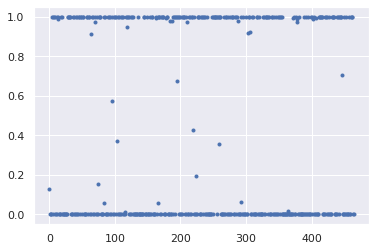

In [59]:
plt.plot(LOW_cl_pred_public, '.')

(array([263.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 202.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

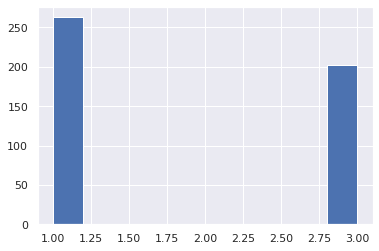

In [60]:
plt.hist(LOW_reg_pred_public)

#### private

In [61]:
E_pred_private = (df_private['sig_count_y'].values - b_NR)/a_NR 
idx_LOW_private = [i for i in range(len(E_pred_private)) if E_pred_private[i] <= 6]

In [62]:
LOW_cl_pred = np.array(list(clf.predict(df_private.iloc[idx_LOW_private][clf_vars_publ])))
LOW_cl_pred = 1 - LOW_cl_pred
LOW_reg_pred = np.array([1 if LOW_cl_pred[i]>0.9999 else 3 for i in range(len(idx_LOW_private))])
LOW_im_names = np.array(list(df_private.iloc[idx_LOW_private]['image_name'].values))

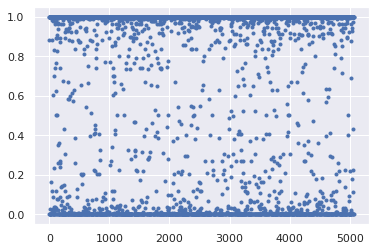

In [63]:
plt.plot(LOW_cl_pred, '.')

(array([2556.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2510.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

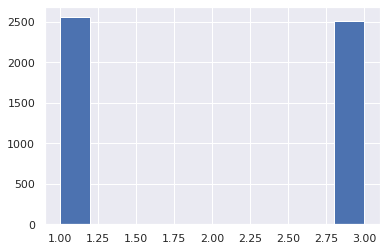

In [64]:
plt.hist(LOW_reg_pred)

In [65]:
# plt.hist((df_private.iloc[idx_LOW_private][clf_vars].values), bins=100, range=(-3000,3000))
# plt.show()

In [66]:
# LOW_cl_pred = np.array(list((df_private.iloc[idx_LOW_private][clf_vars].values - E_th) / 1000))
# LOW_cl_pred[LOW_cl_pred > 1] = 1
# LOW_cl_pred[LOW_cl_pred < -1] = -1
# LOW_cl_pred += 1
# LOW_cl_pred /= 2
# LOW_cl_pred = 1 - LOW_cl_pred

# LOW_reg_pred = np.array([1 if LOW_cl_pred[i]>0.5 else 3 for i in range(len(idx_LOW_private))])
# LOW_im_names = np.array(list(df_private.iloc[idx_LOW_private]['image_name'].values))

In [67]:
# val_pred = np.array((df.query('event_energy == 1 and event_class == "ER"')['sig_count_y'].values - E_th)/1000)
# val_pred[val_pred>1] = 1
# val_pred[val_pred < -1] = -1
# val_pred += 1
# val_pred /= 2
# val_pred = 1 - val_pred
# print(df.query('event_energy == 1 and event_class == "ER"')['sig_count_y'])
# print(val_pred)

In [68]:
# val_pred = np.array((df.query('event_energy == 3 and event_class == "NR"')['sig_count_y'].values - E_th)/1000)
# val_pred[val_pred>1] = 1
# val_pred[val_pred < -1] = -1
# val_pred += 1
# val_pred /= 2
# val_pred = 1 - val_pred
# print(df.query('event_energy == 3 and event_class == "NR"')['sig_count_y'])
# print(val_pred)

In [492]:
# plt.plot(LOW_cl_pred, '.')

In [493]:
# plt.hist(LOW_reg_pred)

In [69]:
len(LOW_im_names) + len(LOW_im_names_public)

5531

#### submission

In [494]:
cl_pred = np.append(np.round(LOW_cl_pred_public), np.round(LOW_cl_pred))
reg_pred = np.append(LOW_reg_pred_public, LOW_reg_pred)
im_names = np.append(LOW_im_names_public, LOW_im_names)
generate_submission(cl_pred, reg_pred, im_names, 'LOW_predictions')

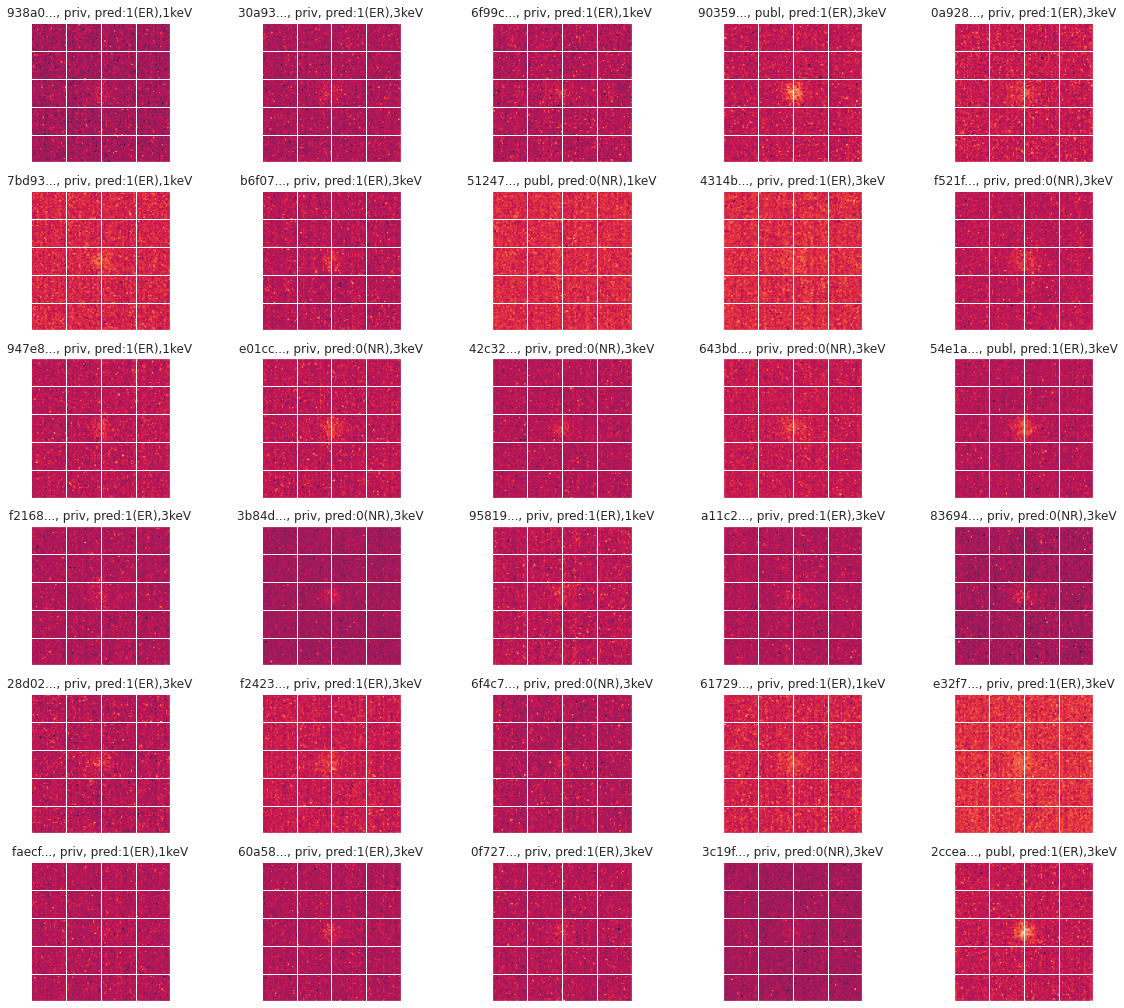

In [495]:
tmp = plot_images('../../idao_dataset/', im_filename='LOW_predictions.csv', max_num_images=30)

## Full submission

In [70]:
cl_pred = np.append(np.round(LOW_cl_pred_public), np.round(LOW_cl_pred))
cl_pred = np.append(cl_pred, np.round(MID_cl_pred_public))
cl_pred = np.append(cl_pred, np.round(MID_cl_pred))
cl_pred = np.append(cl_pred, np.round(HE_cl_pred_public))
cl_pred = np.append(cl_pred, np.round(HE_cl_pred))

reg_pred = np.append(LOW_reg_pred_public, LOW_reg_pred)
reg_pred = np.append(reg_pred, MID_reg_pred_public)
reg_pred = np.append(reg_pred, MID_reg_pred)
reg_pred = np.append(reg_pred, HE_reg_pred_public)
reg_pred = np.append(reg_pred, HE_reg_pred)

im_names = np.append(LOW_im_names_public, LOW_im_names)
im_names = np.append(im_names, MID_im_names_public)
im_names = np.append(im_names, MID_im_names)
im_names = np.append(im_names, HE_im_names_public)
im_names = np.append(im_names, HE_im_names)

assert(len(im_names) == len(reg_pred))
assert(len(im_names) == len(cl_pred))
assert(len(im_names) == len(df_private) + len(df_public))

generate_submission(cl_pred, reg_pred, im_names, '11_pipeline_prediction')

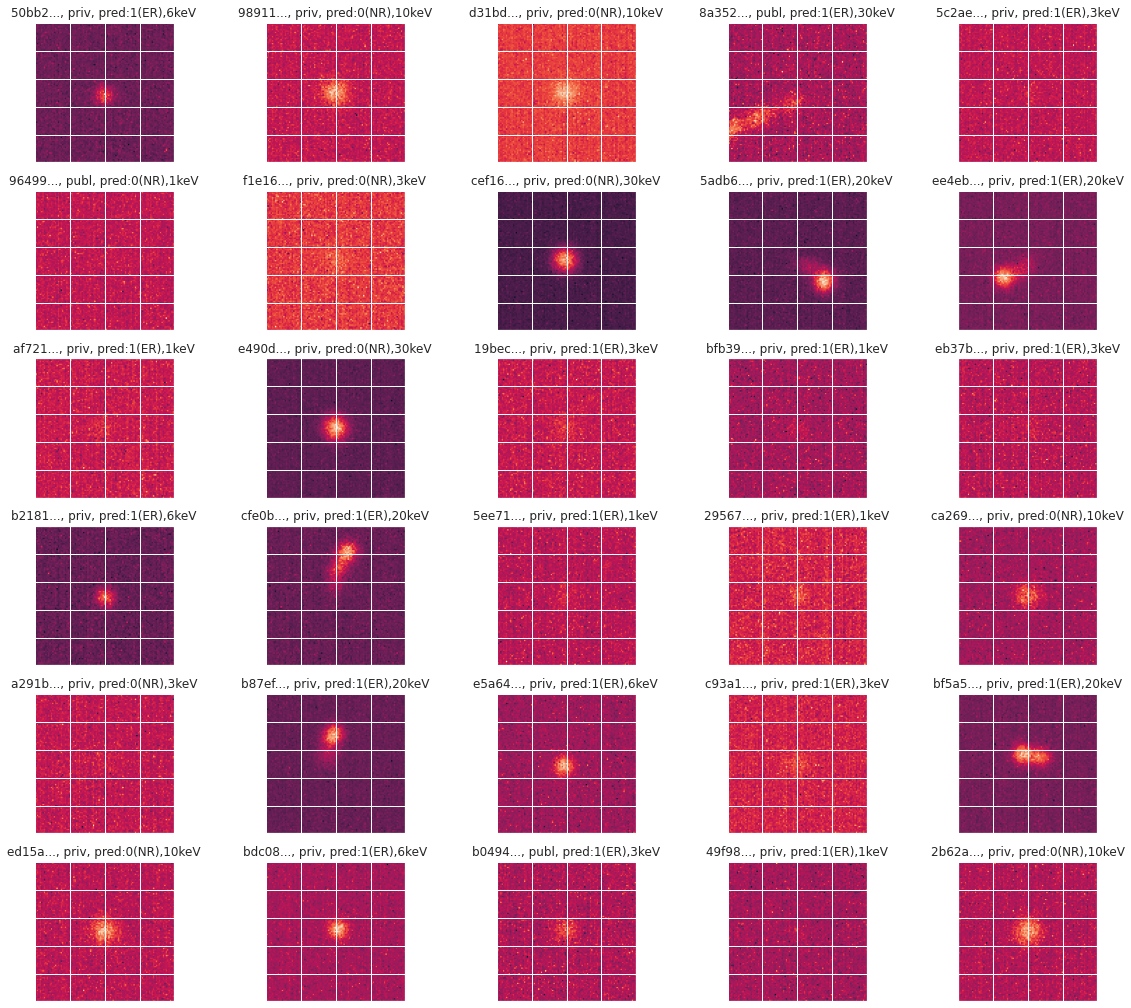

In [71]:
tmp = plot_images('../../idao_dataset/', im_filename='11_pipeline_prediction.csv', max_num_images=30)